In [1]:
 import pandas as pd
 import numpy as np
 import seaborn as sns
 import matplotlib.pyplot as plt
 from scipy import stats


In [2]:
data= {
 'Student_ID': range(1, 11), 'Maths_Score': [85, 92, np.nan, 78, 88, 85, 79, 93, 105, 74],
 'English_Score': [78, 85, 90, 82, np.nan, 88, 74, 91, 86, 80], 'Science_Score': [89, 91, 94, 76, 88,
 np.nan, 72, 85, 98, 74]
 }


In [3]:
df= pd.DataFrame(data)

In [5]:
print("Initial Dataset:")
print(df)

Initial Dataset:
   Student_ID  Maths_Score  English_Score  Science_Score
0           1         85.0           78.0           89.0
1           2         92.0           85.0           91.0
2           3          NaN           90.0           94.0
3           4         78.0           82.0           76.0
4           5         88.0            NaN           88.0
5           6         85.0           88.0            NaN
6           7         79.0           74.0           72.0
7           8         93.0           91.0           85.0
8           9        105.0           86.0           98.0
9          10         74.0           80.0           74.0


In [6]:
missing_values = df.isnull().sum()

In [9]:
print("InMissing values in each column:")
print(missing_values)

InMissing values in each column:
Student_ID       0
Maths_Score      1
English_Score    1
Science_Score    1
dtype: int64


In [11]:
df['Maths_Score'].fillna(df['Maths_Score'].mean(), inplace=True)
df['English_Score'].fillna(df['English_Score'].mean(), inplace=True)
df['Science_Score'].fillna(df['Science_Score'].mean(), inplace=True)
print("InDataset after handling missing values:")
print(df)

InDataset after handling missing values:
   Student_ID  Maths_Score  English_Score  Science_Score
0           1    85.000000      78.000000      89.000000
1           2    92.000000      85.000000      91.000000
2           3    86.555556      90.000000      94.000000
3           4    78.000000      82.000000      76.000000
4           5    88.000000      83.777778      88.000000
5           6    85.000000      88.000000      85.222222
6           7    79.000000      74.000000      72.000000
7           8    93.000000      91.000000      85.000000
8           9   105.000000      86.000000      98.000000
9          10    74.000000      80.000000      74.000000


C:\Users\Shree\AppData\Local\Temp\ipykernel_4164\2964642922.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Maths_Score'].fillna(df['Maths_Score'].mean(), inplace=True)
C:\Users\Shree\AppData\Local\Temp\ipykernel_4164\2964642922.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 

In [14]:
z_scores =np.abs(stats.zscore(df[['Maths_Score','Science_Score','English_Score' ]]))
print("nz-scores of the dataset:")
print(z_scores)

nz-scores of the dataset:
   Maths_Score  Science_Score  English_Score
0     0.185104   4.575997e-01   1.129741e+00
1     0.647863   6.998584e-01   2.389837e-01
2     0.000000   1.063246e+00   1.216644e+00
3     1.018070   1.117082e+00   3.476126e-01
4     0.171882   3.364704e-01   2.778678e-15
5     0.185104   1.721352e-15   8.255799e-01
6     0.899075   1.601599e+00   1.911869e+00
7     0.766858   2.691763e-02   1.412176e+00
8     2.194800   1.547764e+00   4.345157e-01
9     1.494050   1.359340e+00   7.386768e-01


In [16]:
outliers = (z_scores > 3)
print("Inoutliers detected (True means outlier):")
print(outliers)

Inoutliers detected (True means outlier):
   Maths_Score  Science_Score  English_Score
0        False          False          False
1        False          False          False
2        False          False          False
3        False          False          False
4        False          False          False
5        False          False          False
6        False          False          False
7        False          False          False
8        False          False          False
9        False          False          False


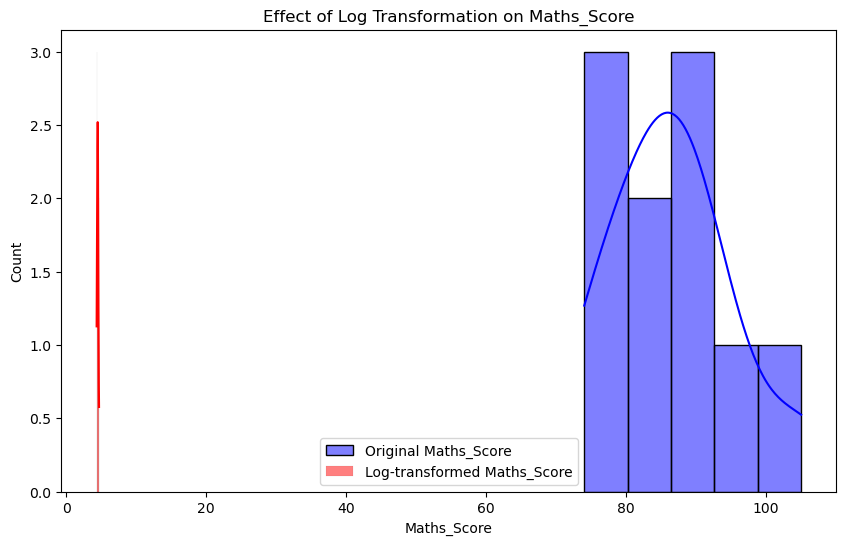

   Student_ID  Maths_Score  English_Score  Science_Score  Maths_Score_log
0           1    85.000000      78.000000      89.000000         4.454347
1           2    92.000000      85.000000      91.000000         4.532599
2           3    86.555556      90.000000      94.000000         4.472274
3           4    78.000000      82.000000      76.000000         4.369448
4           5    88.000000      83.777778      88.000000         4.488636
5           6    85.000000      88.000000      85.222222         4.454347
6           7    79.000000      74.000000      72.000000         4.382027
7           8    93.000000      91.000000      85.000000         4.543295
8           9   105.000000      86.000000      98.000000         4.663439
9          10    74.000000      80.000000      74.000000         4.317488


In [18]:
df[ 'Maths_Score_log']=np.log(df['Maths_Score']+1)
plt.figure(figsize=(10, 6))
sns.histplot(df['Maths_Score'], kde=True, color='blue', label='Original Maths_Score')
sns.histplot(df['Maths_Score_log'], kde=True, color='red', label='Log-transformed Maths_Score')
plt.legend()
plt.title("Effect of Log Transformation on Maths_Score")
plt.show()
print(df)